# **Author: Ramgopal Selvaraj**

**Task 1 : Prediction using Supervised Machine Learning**

In this task we are about to predict the percentage of a student based on the number of study hours they studied which involves Simple Linear Regression modelling using two variables.

In [486]:
# Importing all libraries required in this notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Reading data from remote link and storing it in a data frame

In [487]:
data_source = "http://bit.ly/w-data"
inp_data = pd.read_csv(data_source)
print("Data was imported into a DataFrame successfully")

Data was imported into a DataFrame successfully


Printing the sample data from the DataFrame to check how the data looks alike


In [488]:
inp_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [489]:
inp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Determine the size of the DataFrame and check the DataFrame for any null values

In [490]:
print("The dataset has the below number of columns and rows in total :  ")
print(inp_data.shape)
print()

print("The dataset has the below number of NULL values by columnwise :  ")
inp_data.isna().sum()

The dataset has the below number of columns and rows in total :  
(25, 2)

The dataset has the below number of NULL values by columnwise :  


Hours     0
Scores    0
dtype: int64

Generating descriptive statistics by using the **describe** method which includes **mean, median, standard deviation, minimum, maximum, 25th, 50th 75th percentiles**.

**NOTE:** "(include = 'all')" will describe all columns of a DataFrame regardless of data type.

In [491]:
inp_data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting the DataFrame to find any correlation between the data points.

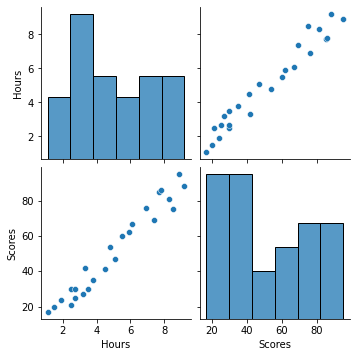

In [492]:
sns.pairplot(inp_data )

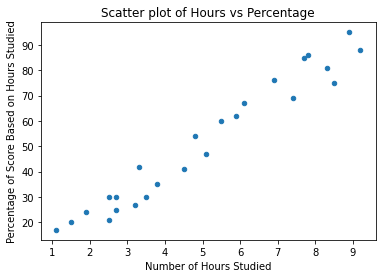

In [493]:
inp_data.plot(x='Hours', y='Scores',kind= 'scatter')  
plt.title('Scatter plot of Hours vs Percentage')
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage of Score Based on Hours Studied')  
plt.show()

From the above scatter plot, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the data to test and train the model**

Let's split the data into labels and features. Using features(the data we use to predict labels), we predict labels (the data we want to predict).

In [494]:
X = inp_data.Hours.values.reshape(-1,1)
y = inp_data.Scores.values.reshape(-1,1)

print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


Now that we have labels and features, we are about to split this into training and test data. It can be achieved by using Scikit-Learn's train_test_split method.

In [495]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.33, random_state = None )

Now that we have splitted the data into testing and training sets, we need to train our algorithm using Linear Regression by importing LinearRegression class, instantiating it, and calling the fit() method along with our training data..

# **Training the algorithm**

[0.31773026]
[[10.30197368]]


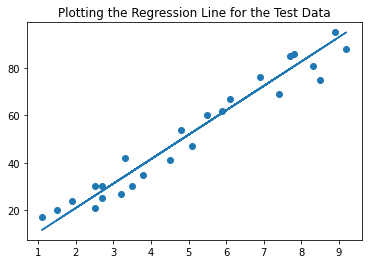

In [496]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  

regressor.fit(X_train, y_train) #training the algorithm


#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Plotting the Regression Line for the Test Data')
plt.show()

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:



In [497]:
y_pred = regressor.predict(X_test)

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [498]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,17,11.649901
1,25,28.133059
2,24,19.891480
3,85,79.642928
4,47,52.857796
5,69,76.552336
6,30,28.133059
7,81,85.824112
8,88,95.095888


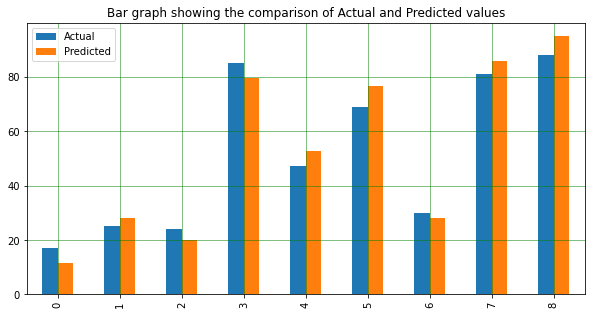

In [499]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Bar graph showing the comparison of Actual and Predicted values")
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

Let's plot our straight line with the test data :

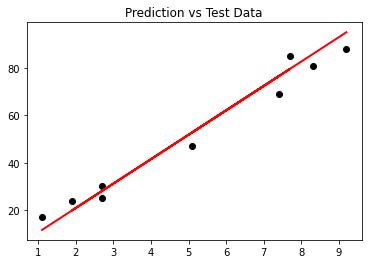

In [500]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("Prediction vs Test Data")
plt.show()

The straight line in the above graph shows our algorithm is correct.

**Testing with our own data**

In [501]:
hours = np.array([9.25])
own_prediction = regressor.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_prediction[0]))

No of Hours = [9.25]
Predicted Score = [95.61098684]


# **Evaluating the model**

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.  
2. Mean Squared Error (MSE) is the mean of the squared errors. 
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [502]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 5.01620248538011
Mean Squared Error: 28.053163662016143
Root Mean Squared Error: 5.296523733734811


# **Model Score**

In [503]:
#for training data
print("Model Score for Training Data is  :",regressor.score(X_train,y_train))

#for test data
print("Model Score for Test Data is  :",regressor.score(X_test,y_test))


Model Score for Training Data is  : 0.939708630260619
Model Score for Test Data is  : 0.9626597059088424
